In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re

from toolz.curried import unique


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [8]:
# path = "results/linear_multi"
path = "Simulations/results/lin"
# path = "results/lin/bym"
all_file = glob.glob(path + "/*.csv")
print(len(all_file))

39


In [9]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
# combined_df['method'] = combined_df['method'].replace({
#     'BYM_1S_rep': 'BYMrep_1S',
#     'BYM_3S_rep': 'BYMrep_3S',
#     'Linear_3S_rep' : 'Linearrep_3S',
#     'Linear_1S_rep' : 'Linearrep_1S',
# })

combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
# combined_df[combined_df["method"] in ["BYM_1S_rep",]]
# print(combined_df.head(5))
print(combined_df['method'].unique())
print(combined_df['model'].unique())
print(combined_df['type'].unique())

['Linear_oracle' 'BYM_oracle' 'Linear_observed' 'BYM_observed' 'Linear_3S'
 'BYM_3S' 'Linear_1S' 'BYM_1S']
['Linear' 'BYM']
['oracle' 'observed' '3S' '1S']


In [10]:
print(combined_df.columns, combined_df.shape)

Index(['idx', 'mean', 'median', 'true', 'bias', 'std', 'RMSE', 'RMSE_all',
       'MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
       'q025', 'q975', 'covering', 'mean_ind_cover', 'method', 'estimand',
       'model', 'type'],
      dtype='object') (5792, 22)


In [11]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

# combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 
#                                                                         'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [12]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
# combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [13]:
# print dtype of each column 
print(combined_df.dtypes)

idx               float64
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
model              object
type               object
abs_bias          float64
ci_length         float64
dtype: object


34
0.46500003


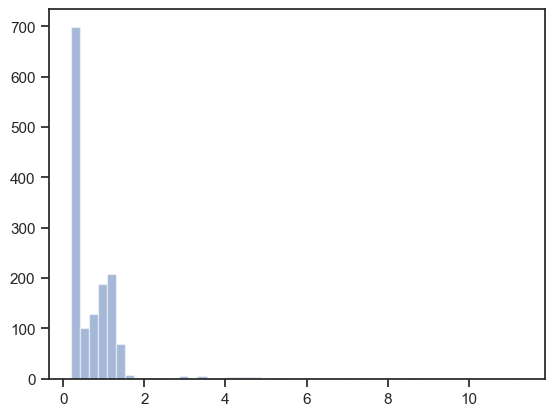

In [14]:
plt.hist(combined_df[combined_df['type'] == '3S']['MAE'], bins=50, alpha=0.5, label='Observed')

err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
print(err_mask.sum())

print(combined_df[combined_df['type'] == '3S']['MAE'].median())


In [15]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 3)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(5456, 24)


In [11]:
combined_df

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q025,q975,covering,mean_ind_cover,method,estimand,model,type,abs_bias,ci_length
0,1.0,0.577,0.576,0.692,-0.115,0.076,0.287,0.316,0.115,0.143,...,0.432,0.729000,1.0,0.896,Linear_oracle,dynamic,Linear,Oracle,0.115,0.297000
1,1.0,1.082,0.982,0.692,0.390,0.426,0.673,1.040,0.389,0.430,...,0.535,2.138000,1.0,1.000,BYM_oracle,dynamic,BYM,Oracle,0.390,1.603000
2,1.0,2.182,2.176,2.620,-0.438,0.286,0.442,0.543,0.439,0.464,...,1.636,2.752000,1.0,0.792,Linear_oracle,stoch,Linear,Oracle,0.438,1.116000
3,1.0,4.095,3.717,2.620,1.475,1.614,1.535,2.280,1.475,1.592,...,2.025,8.096001,1.0,1.000,BYM_oracle,stoch,BYM,Oracle,1.475,6.071001
4,1.0,0.387,0.386,0.692,-0.305,0.087,0.487,0.505,0.351,0.359,...,0.222,0.559000,0.0,0.304,Linear_observed,dynamic,Linear,Obs.,0.305,0.337000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,394.0,3.905,3.615,2.620,1.285,1.804,1.344,2.344,1.285,1.712,...,1.423,8.041000,1.0,0.998,BYM_3S,stoch,BYM,3S,1.285,6.618000
124,394.0,0.818,0.815,0.692,0.126,0.120,0.287,0.335,0.236,0.267,...,0.589,1.060000,1.0,0.478,Linear_1S,dynamic,Linear,1S,0.126,0.471000
125,394.0,1.246,1.126,0.692,0.554,0.454,0.744,1.030,0.569,0.607,...,0.673,2.355000,1.0,0.482,BYM_1S,dynamic,BYM,1S,0.554,1.682000
126,394.0,3.039,3.028,2.620,0.419,0.441,0.597,0.762,0.479,0.582,...,2.197,3.930000,1.0,0.868,Linear_1S,stoch,Linear,1S,0.419,1.733000


In [18]:
# Save as csv
combined_df.to_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")

In [ ]:
# TODO: clean all the above in final version

In [ ]:
combined_df = pd.read_csv("Simulations/results/linear_results_combined_iid_and_bym_N500.csv")
# combined_df = pd.read_csv("results/linear_results_combined_N500.csv")
combined_df['rel_RMSE'] = np.sqrt(combined_df['rel_RMSE'])
combined_df['rel_RMSE_all'] = np.sqrt(combined_df['rel_RMSE_all'])

In [19]:
def coverage_perc(x):
    return np.mean(x)*100

def mean_std(x):
    mean,std = np.mean(x), np.std(x)
    return "{:.3f} ({:.3f})".format(mean,std)

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {
                                            # 'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         'bias' : [mean_std],
                                         'std' : [mean_std],
                                         # 'true' : ['mean'],
                                         # 'RMSE' : ['mean'],
                                         'RMSE' : [mean_std],
                                         # 'RMSE_all' : ['mean'],
                                         'RMSE_all' : [mean_std],
                                         'MAE' : [mean_std],
                                         'MAE_all' : [mean_std],
                                         'MAPE' : [mean_std],
                                        'MAPE_all' : [mean_std],
                                         'rel_RMSE' : [mean_std],
                                        'rel_RMSE_all' : [mean_std],
                                        #  'q025' : ['mean'],
                                        #  'q975' : ['mean'],
                                         'ci_length' : [mean_std],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean'],}
                                         # 'norm_coverage' : [coverage_perc]}

                                            ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

# df_summary.columns = ['estimand','model','type','bias','bias_std', 'rel_RMSE','rel_RMSE_std', 'ci_length','ci_length_std','covering','mean_ind_cover']
df_summary

,estimand,model,type,bias,std,RMSE,RMSE_all,MAE,MAE_all,MAPE,MAPE_all,rel_RMSE,rel_RMSE_all,ci_length,covering,mean_ind_cover
,,,,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,mean_std,coverage_perc,mean
0,dynamic,BYM,1S,0.017 (0.105),0.205 (0.106),0.310 (0.067),0.519 (0.136),0.238 (0.040),0.313 (0.099),0.253 (0.148),2688.373 (1206.149),0.448 (0.097),0.749 (0.196),0.789 (0.273),100.000000,0.611953
1,dynamic,BYM,3S,-0.200 (0.096),0.227 (0.083),0.383 (0.074),0.656 (0.139),0.279 (0.050),0.388 (0.057),0.388 (0.091),1375.693 (588.830),0.553 (0.107),0.948 (0.201),0.919 (0.319),92.082111,0.828968
2,dynamic,BYM,Obs.,-0.387 (0.299),0.337 (0.170),0.723 (0.407),0.948 (0.376),0.479 (0.239),0.591 (0.256),0.675 (0.376),2139.471 (1478.565),1.044 (0.588),1.370 (0.544),1.059 (0.364),77.712610,0.592252
3,dynamic,BYM,Oracle,0.003 (0.101),0.173 (0.046),0.194 (0.120),0.414 (0.129),0.107 (0.060),0.179 (0.044),0.220 (0.056),0.230 (0.060),0.280 (0.174),0.598 (0.186),0.670 (0.176),98.826979,0.975965
4,dynamic,Linear,1S,-0.130 (0.102),0.095 (0.016),0.412 (0.077),0.435 (0.072),0.285 (0.044),0.297 (0.042),0.229 (0.102),2365.827 (649.632),0.595 (0.112),0.628 (0.104),0.372 (0.065),70.967742,0.421138
5,dynamic,Linear,3S,-0.305 (0.054),0.077 (0.015),0.504 (0.074),0.531 (0.068),0.344 (0.044),0.366 (0.040),0.440 (0.077),1196.902 (290.544),0.728 (0.106),0.767 (0.098),0.300 (0.056),0.586510,0.637836
6,dynamic,Linear,Obs.,-0.384 (0.063),0.070 (0.005),0.570 (0.075),0.582 (0.072),0.408 (0.049),0.412 (0.048),0.555 (0.090),814.858 (332.385),0.823 (0.108),0.841 (0.104),0.275 (0.020),0.000000,0.272886
7,dynamic,Linear,Oracle,-0.156 (0.065),0.070 (0.005),0.320 (0.094),0.346 (0.083),0.163 (0.056),0.176 (0.047),0.234 (0.081),0.211 (0.077),0.462 (0.136),0.500 (0.119),0.275 (0.020),40.469208,0.746886
8,stoch,BYM,1S,0.089 (0.400),0.785 (0.413),0.578 (0.183),1.011 (0.417),0.470 (0.169),0.757 (0.390),0.255 (0.152),0.299 (0.163),0.221 (0.070),0.386 (0.159),3.017 (1.061),100.000000,0.960006


In [23]:
def generate_latex_table(df):
    # Round all numeric columns to 3 decimal places
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].round(3)

    # Start the LaTeX table
    latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Simulation Results}\n\\label{tab:simulation_results}\n"
    latex_table += "\\begin{tabular}{lllcccc}\n\\toprule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    latex_table += "Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"

    # Group by estimand and model
    for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
        for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
            if m > 0:
                latex_table += "\\cmidrule{2-7}\n"
                # latex_table += "\\cmidrule{2-6}\n"

            for i, (_, row) in enumerate(model_group.iterrows()):
                if i == 0:
                    if m == 0:
                        latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
                    else:
                        latex_table += " & "
                    latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
                else:
                    latex_table += " & "
                
                bias_str = f"{row['bias']:.3f} ({row['bias_std']:.3f})"
                # mape_str = f"{row['MAPE']:.3f} ({row['MAPE_std']:.3f})"
                mape_str = f"{row['rel_RMSE']:.3f} ({row['rel_RMSE_std']:.3f})"
                ci_length_str = f"{row['ci_length']:.3f} ({row['ci_length_std']:.3f})"
                coverage_str = f"{row['covering']:.1f}\\%"
                
                latex_table += f"& {row['type']} & {bias_str} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"
                # latex_table += f"& {row['type']} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"

        if e == 0:  # Add midrule after first estimand
            latex_table += "\\midrule\n"

    # End the LaTeX table
    latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

    return latex_table


# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary)
print(latex_table)

\begin{table}[htbp]
\centering
\caption{Simulation Results}
\label{tab:simulation_results}
\begin{tabular}{lllcccc}
\toprule
Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\
\midrule
\multirow{8}{*}{dynamic} & \multirow{4}{*}{BYM} & 1S & 0.158 (0.140) & 0.329 (0.213) & 0.892 (0.170) & 94.4\% \\
 & & 3S & -0.119 (0.109) & 0.273 (0.173) & 0.986 (0.308) & 98.8\% \\
 & & Obs. & -0.317 (0.319) & 1.509 (1.740) & 1.081 (0.359) & 81.7\% \\
 & & Oracle & 0.061 (0.107) & 0.157 (0.199) & 0.695 (0.144) & 99.2\% \\
\cmidrule{2-7}
 & \multirow{4}{*}{Linear} & 1S & -0.044 (0.115) & 0.337 (0.115) & 0.392 (0.071) & 84.1\% \\
 & & 3S & -0.237 (0.053) & 0.455 (0.151) & 0.317 (0.045) & 15.5\% \\
 & & Obs. & -0.327 (0.080) & 0.606 (0.205) & 0.312 (0.037) & 3.2\% \\
 & & Oracle & -0.131 (0.072) & 0.232 (0.132) & 0.263 (0.036) & 49.0\% \\
\midrule
\multirow{8}{*}{stoch} & \multirow{4}{*}{BYM} & 1S & 0.413 (0.523) & 0.090 (0.095) & 3.391 (0.636) & 97.2\% \\
 & & 3S & -0.6

Text(0, 0.5, '')

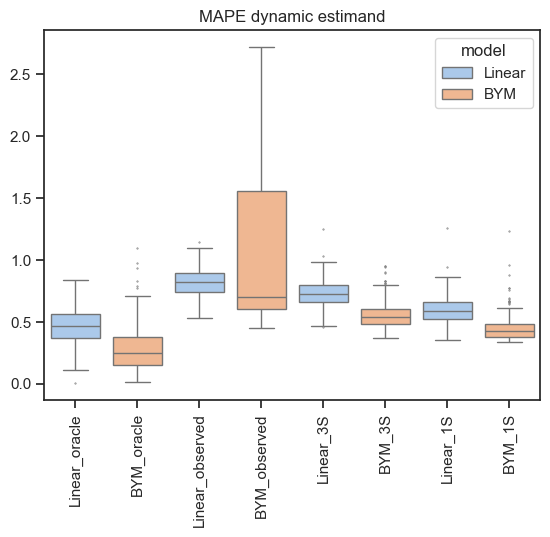

In [22]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'rel_RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

In [30]:
# Zeigen MAE plots

from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)


zeigen_mae_obs = np.loadtxt('Simulations/results/zeigen_mae_obs.txt')
esti_zeigen_mae_post = np.loadtxt('Simulations/results/esti_zeigen_mae_post.txt')
zeigen_mae_post = np.loadtxt('Simulations/results/zeigen_mae_post.txt')

# remove all values above 3
zeigen_mae_obs = zeigen_mae_obs[zeigen_mae_obs < 3]
esti_zeigen_mae_post = esti_zeigen_mae_post[esti_zeigen_mae_post < 3]
zeigen_mae_post = zeigen_mae_post[zeigen_mae_post < 3]

# print shape of each file
print(zeigen_mae_obs.shape)
print(esti_zeigen_mae_post.shape)
print(zeigen_mae_post.shape)



(376,)
(349,)
(351,)


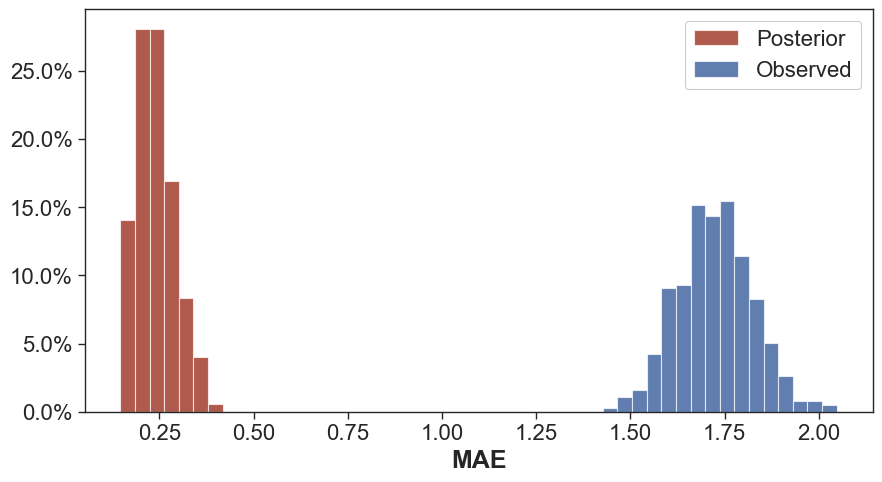

In [37]:
def plot_percentage_histogram(data, bin_edges, ax, label, color, alpha=0.7):
    counts, _ = np.histogram(data, bins=bin_edges, density=True)
    bin_widths = np.diff(bin_edges)
    percentage = counts * bin_widths * 100  # Convert to percentage
    ax.bar(bin_edges[:-1], percentage, width=bin_widths, alpha=alpha, label=label, color=color, align='edge')

fig, ax = plt.subplots(figsize=(9, 5))

# Define common bin edges
common_bin_edges = np.linspace(min(min(zeigen_mae_obs), min(esti_zeigen_mae_post)), 
                               max(max(zeigen_mae_obs), max(esti_zeigen_mae_post)), 
                               50)  # 20 bins

# Plot histograms as density
plot_percentage_histogram(esti_zeigen_mae_post, common_bin_edges, ax, 'Posterior', 'xkcd:brick red')
plot_percentage_histogram(zeigen_mae_obs, common_bin_edges, ax, 'Observed', 'xkcd:cobalt')

# Set labels and title
ax.set_xlabel('MAE', fontsize=18, fontweight='bold')
ax.set_ylabel('')
ax.set_title('')

# Adjust y-axis to show correct percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# Add legend
ax.legend(fontsize=16, frameon=True, fancybox=True, framealpha=1)

# Save the figure
plt.tight_layout()
# plt.savefig('Simulations/results/figs/mae_hist.png', dpi=1000)
plt.show()
